# Ensemble Tweets - Level 2

In [1]:
import pandas as pd

In [12]:
set2 = pd.read_csv('/content/drive/My Drive/Tweets/3. Feature Engineering/set2.csv')
set3 = pd.read_csv('/content/drive/My Drive/Tweets/3. Feature Engineering/set3.csv')


In [3]:
x2 = pd.read_csv('/content/drive/My Drive/Tweets/5. Predict Probas/set2_probas.csv') # Train : Set-2 Predict_probas
x3 = pd.read_csv('/content/drive/My Drive/Tweets/5. Predict Probas/set3_probas.csv')# Val : Set-3 Predict_probas
test = pd.read_csv('/content/drive/My Drive/Tweets/5. Predict Probas/test_probas.csv')

Bert2 = pd.read_csv('/content/drive/My Drive/Tweets/5. Predict Probas/set2_Bert_proba.csv')
Bert3 = pd.read_csv('/content/drive/My Drive/Tweets/5. Predict Probas/set3_Bert_proba.csv')
Bert_test = pd.read_csv('/content/drive/My Drive/Tweets/5. Predict Probas/test_data_Bert_proba.csv')

Roberta2 = pd.read_csv('/content/drive/My Drive/Tweets/5. Predict Probas/set2_Roberta_proba.csv')
Roberta3 = pd.read_csv('/content/drive/My Drive/Tweets/5. Predict Probas/set3_Roberta_proba.csv')
Roberta_test = pd.read_csv('/content/drive/My Drive/Tweets/5. Predict Probas/test_data_Roberta_proba.csv')


In [4]:
Bert_test[:2]

,Bert_1,Bert_0
0,0.954075,0.045925
1,0.965994,0.034006


In [5]:
#Adding Bert Probas to x2, x3, test

x2['Bert_1'] = Bert2['Bert_1']
x2['Bert_0'] = Bert2['Bert_0']

x3['Bert_1'] = Bert3['Bert_1']
x3['Bert_0'] = Bert3['Bert_0']

test['Bert_1'] = Bert_test['Bert_1']
test['Bert_0'] = Bert_test['Bert_0']


# Adding Robert Probas to x2, x3, test

x2['Roberta_1'] = Roberta2['Roberta_1']
x2['Roberta_0'] = Roberta2['Roberta_0']

x3['Roberta_1'] = Roberta3['Roberta_1']
x3['Roberta_0'] = Roberta3['Roberta_0']

test['Roberta_1'] = Roberta_test['Roberta_1']
test['Roberta_0'] = Roberta_test['Roberta_0']

In [6]:
x2[:1]

,gb1,gb0,lr1,lr0,svc1,svc0,bayes1,bayes0,tree1,tree0,cat1,cat0,Bert_1,Bert_0,Roberta_1,Roberta_0
0,0.3631,0.6369,0.418081,0.581919,0.578602,0.421398,0.536737,0.463263,0.54,0.46,0.456238,0.543762,0.388212,0.611788,0.188238,0.811762


In [8]:
x3[:1]

,gb1,gb0,lr1,lr0,svc1,svc0,bayes1,bayes0,tree1,tree0,cat1,cat0,Bert_1,Bert_0,Roberta_1,Roberta_0
0,0.174052,0.825948,0.907352,0.092648,0.089012,0.910988,0.227634,0.772366,0.06,0.94,0.456238,0.543762,0.057976,0.942024,0.073738,0.926262


In [18]:
test[:1]

,gb1,gb0,lr1,lr0,svc1,svc0,bayes1,bayes0,tree1,tree0,cat1,cat0,Bert_1,Bert_0,Roberta_1,Roberta_0
0,0.276864,0.723136,0.430683,0.569317,0.649411,0.350589,0.191533,0.808467,0.4,0.6,0.522109,0.477891,0.954075,0.045925,0.986153,0.013847


In [14]:
y2 = set2.target
y3 = set3.target

In [16]:
y3.value_counts()

0    1073
1     831
Name: target, dtype: int64

In [ ]:
x2['Bert_1'][:5].values.tolist()

[0.9924941062927246,
 0.4857236444950104,
 0.07621973752975464,
 0.03696670383214951,
 0.1439274400472641]

In [21]:
def deci(r):
  return '%.4f'%r

In [17]:
x2.columns, x3.columns, test.columns

(Index(['gb1', 'gb0', 'lr1', 'lr0', 'svc1', 'svc0', 'bayes1', 'bayes0', 'tree1',
        'tree0', 'cat1', 'cat0', 'Bert_1', 'Bert_0', 'Roberta_1', 'Roberta_0'],
       dtype='object'),
 Index(['gb1', 'gb0', 'lr1', 'lr0', 'svc1', 'svc0', 'bayes1', 'bayes0', 'tree1',
        'tree0', 'cat1', 'cat0', 'Bert_1', 'Bert_0', 'Roberta_1', 'Roberta_0'],
       dtype='object'),
 Index(['gb1', 'gb0', 'lr1', 'lr0', 'svc1', 'svc0', 'bayes1', 'bayes0', 'tree1',
        'tree0', 'cat1', 'cat0', 'Bert_1', 'Bert_0', 'Roberta_1', 'Roberta_0'],
       dtype='object'))

In [19]:
cols = x2.columns.tolist()

In [22]:
for i in cols:
  x2[i] = x2[i].apply(deci)
  x2[i] = x2[i].astype(float)

  x3[i] = x3[i].apply(deci)
  x3[i] = x3[i].astype(float)

  test[i] = test[i].apply(deci)
  test[i] = test[i].astype(float)

In [23]:
test[:1]

,gb1,gb0,lr1,lr0,svc1,svc0,bayes1,bayes0,tree1,tree0,cat1,cat0,Bert_1,Bert_0,Roberta_1,Roberta_0
0,0.2769,0.7231,0.4307,0.5693,0.6494,0.3506,0.1915,0.8085,0.4,0.6,0.5221,0.4779,0.9541,0.0459,0.9862,0.0138


In [24]:
!pip install -q category_encoders
import category_encoders as ce

     |████████████████████████████████| 81kB 2.2MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear',penalty='l1')

In [29]:
model = Pipeline([('enc', ce.LeaveOneOutEncoder()),
                  ('clf', lr ) ])
model.fit(x2,y2)

pred = model.predict(x3)
print('F1 SCORE : %.2f'%f1_score(y3, pred, average='binary'))
print('*'*55)

tn, fp, fn, tp = confusion_matrix(y3, pred).ravel()
print(f'\nTP : {tp} \tFN : {fn} \nTN : {tn} \tFP : {fp} \n\n')
print('*'*55)

print(classification_report(y3, pred))
print('*'*55)

pred_proba = model.predict_proba(x3)
test_proba = model.predict_proba(test)

F1 SCORE : 0.82
*******************************************************

TP : 663 	FN : 168 
TN : 947 	FP : 126 


*******************************************************
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1073
           1       0.84      0.80      0.82       831

    accuracy                           0.85      1904
   macro avg       0.84      0.84      0.84      1904
weighted avg       0.85      0.85      0.85      1904

*******************************************************


In [43]:
print('F1 SCORE on set-3 = ',f1_score(y3, pred, average='binary'))

F1 SCORE on set-3 =  0.8185185185185184


In [42]:
y3[10:20].tolist()

[0, 1, 1, 0, 1, 1, 1, 0, 0, 0]

In [33]:
pred[10:20] #0.3

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1])

In [34]:
pred_proba[10:20] # 0,1 # 1st col: non-disaster proba; 2nd col: Disaster proba

array([[0.91215662, 0.08784338],
       [0.05645705, 0.94354295],
       [0.76936081, 0.23063919],
       [0.5196777 , 0.4803223 ],
       [0.08915985, 0.91084015],
       [0.69863459, 0.30136541],
       [0.05578835, 0.94421165],
       [0.79128657, 0.20871343],
       [0.86300783, 0.13699217],
       [0.08456151, 0.91543849]])

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 891.,  120.,   86.,   65.,  103.,  106.,  118.,  203.,  357.,
        1214.]),
 array([0.04919813, 0.13897913, 0.22876013, 0.31854113, 0.40832213,
        0.49810313, 0.58788413, 0.67766513, 0.76744613, 0.85722713,
        0.94700813]),
 <a list of 10 Patch objects>)

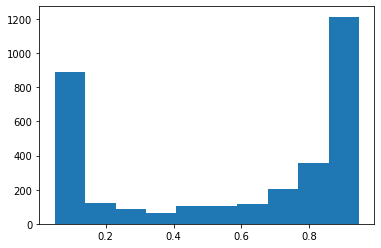

In [38]:
plt.hist(model.predict_proba(test)[:,0])

(array([1214.,  357.,  203.,  118.,  106.,  103.,   65.,   86.,  120.,
         891.]),
 array([0.05299187, 0.14277287, 0.23255387, 0.32233487, 0.41211587,
        0.50189687, 0.59167787, 0.68145887, 0.77123987, 0.86102087,
        0.95080187]),
 <a list of 10 Patch objects>)

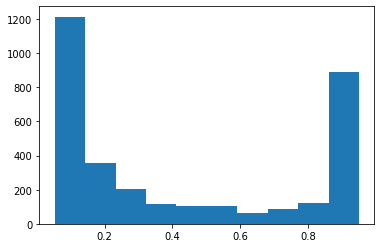

In [39]:
plt.hist(model.predict_proba(test)[:,1])

In [44]:
pred


array([0, 0, 1, ..., 0, 1, 0])

# ADJUSTING THE THRESHOLD

In [47]:
from sklearn.preprocessing import binarize

In [50]:

def all_metrics(n):
  pred = binarize(pred_proba,n)
  predictions = pred[:,1]
  predictions = predictions.astype(int)
  print('F1 SCORE rounded : %.2f'%f1_score(y3, predictions, average='binary'))
  print('\n\nF1 SCORE = ' ,f1_score(y3, predictions, average='binary'))
  tn, fp, fn, tp = confusion_matrix(y3, predictions).ravel()
  print(f'\nTP : {tp} \tFN : {fn} \nTN : {tn} \tFP : {fp} \n\n')
  print('*'*55)

  print(classification_report(y3, predictions))
  print('*'*55)

# DEFAULT THRESHOLD : 0.5

In [51]:
all_metrics(0.5) 

F1 SCORE rounded : 0.82


F1 SCORE =  0.8185185185185184

TP : 663 	FN : 168 
TN : 947 	FP : 126 


*******************************************************
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1073
           1       0.84      0.80      0.82       831

    accuracy                           0.85      1904
   macro avg       0.84      0.84      0.84      1904
weighted avg       0.85      0.85      0.85      1904

*******************************************************


# FINDING THE THRESHOLD WITH THE BEST F1 SCORE


In [52]:
def threshold_selection(n):
  pred = binarize(pred_proba,n)
  predictions = pred[:,1]
  predictions = predictions.astype(int)
  
  return f1_score(y3, predictions, average='binary')
  


In [53]:
q = threshold_selection(0.5)
q

0.8185185185185184

In [54]:
import numpy as np

# Loop through 100 numbers from 0.1 to 1.0 to find the best threshold

In [56]:
f1 = 0.8185185185185184
t = 0.5
# add for loop 0.1-0.99 ; find the value of n for high overall f1 score
for n in np.arange(0.1,1.0,0.01):
  if threshold_selection(n) > f1:
    f1 = threshold_selection(n)
    t = n

print(f1)
print(t)

0.8195908245505271
0.5099999999999998


In [58]:
t1 = threshold_selection(0.5)
t2 = threshold_selection(0.51)

print(t1)
print(t2)


0.8185185185185184
0.8195908245505271


# NEW THRESHOLD


In [59]:
all_metrics(0.51)

F1 SCORE rounded : 0.82


F1 SCORE =  0.8195908245505271

TP : 661 	FN : 170 
TN : 952 	FP : 121 


*******************************************************
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1073
           1       0.85      0.80      0.82       831

    accuracy                           0.85      1904
   macro avg       0.85      0.84      0.84      1904
weighted avg       0.85      0.85      0.85      1904

*******************************************************


# CHANGING THE THRESHOLD TO 0.52

In [60]:

test_proba

array([[0.11126351, 0.88873649],
       [0.14541515, 0.85458485],
       [0.11891572, 0.88108428],
       ...,
       [0.08506614, 0.91493386],
       [0.09174681, 0.90825319],
       [0.13664266, 0.86335734]])

In [61]:
test_proba_new = binarize(test_proba,0.51)

In [63]:
test_proba_new[:20]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.]])

In [64]:

predictions = test_proba_new[:,1]
predictions[:10]

array([1., 1., 1., 1., 1., 1., 0., 0., 0., 0.])

In [65]:
predictions = predictions.astype(int)
predictions[:10]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [66]:
predictions = predictions.tolist()
len(predictions)

3263

# Load Test Data

In [67]:
submission = pd.read_csv('/content/drive/My Drive/Tweets/2. Input/tweets_sample_submission.csv')

In [68]:
output = pd.DataFrame({'id': submission.id, 'target': predictions})

In [69]:
output[:5]

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [70]:
output.to_csv('submission.csv', index=False) 
!cp submission.csv "/content/drive/My Drive/Tweets/7. Output" 